In [89]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import missingno as msno

In [2]:
dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# df = pd.read_csv('calendar.csv', parse_dates = ['date'], data_parser = data_parse)

In [3]:
# Importing the data

df_reviews = pd.read_csv('reviews.csv')
df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv', parse_dates = ['date'], date_parser = dataparse)

<ipython-input-2-78bef9c45d78>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [ ]:
# Reviews dataset

In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
df_reviews.shape

(84849, 6)

In [19]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [21]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [ ]:
# Listings dataset

In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
df_listings.shape

(3818, 92)

In [24]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [217]:
df_listings['review_scores_rating'].head()

0    95.0
1    96.0
2    97.0
3     NaN
4    92.0
Name: review_scores_rating, dtype: float64

In [25]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [16]:
# Can we find an id from df_reviews in df_listing?
df_listings[df_listings['id'] == 7202016]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3226,7202016,https://www.airbnb.com/rooms/7202016,20160104002432,2016-01-04,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Mid century condo, super airy and spacious. H...",Cute mid century condo within walking distance...,none,"Neighborhood has everything. Coffee, restaura...",...,10.0,f,NaN,WASHINGTON,t,flexible,f,f,1,2.82


In [ ]:
# Calendar dataset

In [17]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [18]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [28]:
df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [12]:
df_calendar.shape

(1393570, 4)

In [18]:
# Can we find an id from df_reviewsq/df_listing in df_calendar?
df_calendar[df_calendar['listing_id'] == 7202016]

,listing_id,date,available,price
1177490,7202016,2016-01-04,t,$65.00
1177491,7202016,2016-01-05,t,$65.00
1177492,7202016,2016-01-06,t,$65.00
1177493,7202016,2016-01-07,f,NaN
1177494,7202016,2016-01-08,f,NaN
...,...,...,...,...
1177850,7202016,2016-12-29,t,$75.00
1177851,7202016,2016-12-30,t,$75.00
1177852,7202016,2016-12-31,t,$75.00
1177853,7202016,2017-01-01,t,$75.00


In [26]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [27]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [29]:
# Question 1: What are the busiest times of the year to visit Seattle?

In [30]:
df_listings[['calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365']].head()                                   

,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365
0,4 weeks ago,t,14,41,71,346
1,today,t,13,13,16,291
2,5 weeks ago,t,1,6,17,220
3,6 months ago,t,0,0,0,143
4,7 weeks ago,t,30,60,90,365


In [31]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [32]:
pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
import missingno as msno

<AxesSubplot:>

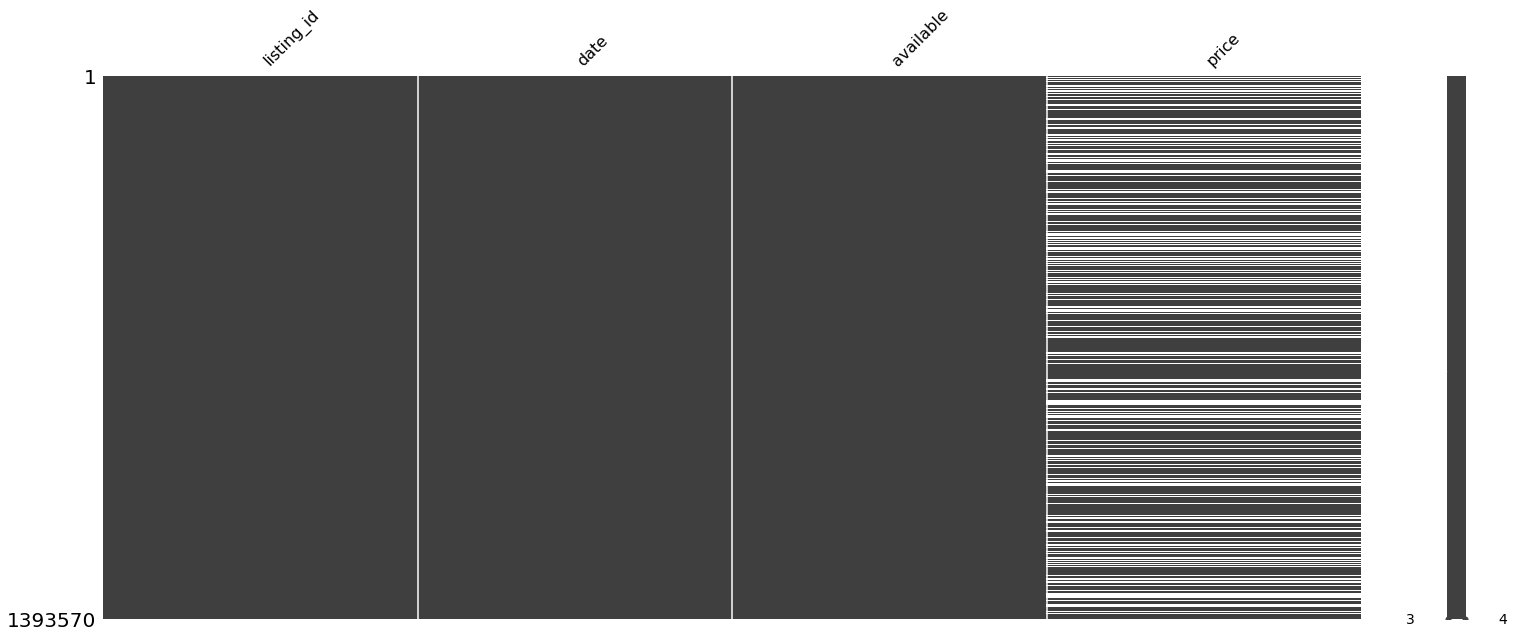

In [34]:
msno.matrix(df_calendar)

In [35]:
# For the fist question we are interestes in the relationship between the variables 'date' and 'available' - These columns have no missing values

In [4]:
df_calendar_available = df_calendar[df_calendar['available'] == 't']
df_calendar_available.shape

(934542, 4)

In [5]:
df_calendar_unavailable = df_calendar[df_calendar['available'] == 'f']
df_calendar_unavailable.shape

(459028, 4)

In [6]:
val_mapping = {
    't':1
}

df_calendar_available['available'] = df_calendar_available['available'].map(val_mapping)

<ipython-input-6-66cca3f5e121>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_available['available'] = df_calendar_available['available'].map(val_mapping)


In [7]:
val_mapping = {
    'f':1
}

df_calendar_unavailable['available'] = df_calendar_unavailable['available'].map(val_mapping)

<ipython-input-7-e173a0f3e4c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_unavailable['available'] = df_calendar_unavailable['available'].map(val_mapping)


In [171]:
df_calendar_available.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
9,241032,2016-01-13,1,$85.00
10,241032,2016-01-14,1,$85.00
14,241032,2016-01-18,1,$85.00


In [172]:
df_calendar_unavailable.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,1,NaN
1393566,10208623,2016-12-30,1,NaN
1393567,10208623,2016-12-31,1,NaN
1393568,10208623,2017-01-01,1,NaN
1393569,10208623,2017-01-02,1,NaN


In [8]:
df_calendar_available.drop(['listing_id'], inplace = True, axis=1)

C:\Users\crdea\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df_calendar_unavailable.drop(['listing_id'], inplace = True,axis=1)

In [10]:
df_calendar_unavailable.head()

,date,available,price
2,2016-01-06,1,NaN
3,2016-01-07,1,NaN
4,2016-01-08,1,NaN
5,2016-01-09,1,NaN
6,2016-01-10,1,NaN


In [11]:
df_calendar_available_group = df_calendar_available.groupby(['date']).sum()

In [12]:
df_calendar_available_group.head()

,available
date,
2016-01-04,1735
2016-01-05,1867
2016-01-06,1826
2016-01-07,1776
2016-01-08,1782


In [13]:
#df_calendar_available_group.drop(['listing_id'], inplace=True, axis=1)

In [14]:
df_calendar_available_group.head()

,available
date,
2016-01-04,1735
2016-01-05,1867
2016-01-06,1826
2016-01-07,1776
2016-01-08,1782


In [15]:
df_calendar_available_group['date_1'] = pd.to_datetime(df_calendar_available_group.index)
df_calendar_available_group.head()

,available,date_1
date,,
2016-01-04,1735,2016-01-04
2016-01-05,1867,2016-01-05
2016-01-06,1826,2016-01-06
2016-01-07,1776,2016-01-07
2016-01-08,1782,2016-01-08


In [16]:
#df_calendar_available_group.drop(['listing_id'], inplace=True,axis=1)

In [17]:
df_calendar_available_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-04 to 2017-01-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  365 non-null    int64         
 1   date_1     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [18]:
df_calendar_available_group_1 = df_calendar_available_group.drop(['date_1'], axis=1)

In [19]:
df_calendar_unavailable_group = df_calendar_unavailable.groupby(['date']).sum()
df_calendar_unavailable_group.head()

,available
date,
2016-01-04,2083
2016-01-05,1951
2016-01-06,1992
2016-01-07,2042
2016-01-08,2036


In [20]:
df_calendar_unavailable_group.drop(['listing_id'], axis=1,inplace=True)

KeyError: "['listing_id'] not found in axis"

In [ ]:
df_calendar_unavailable_group.head()

In [21]:
df_calendar_unavailable_group['date_1'] = pd.to_datetime(df_calendar_unavailable_group.index)
df_calendar_unavailable_group.head()

,available,date_1
date,,
2016-01-04,2083,2016-01-04
2016-01-05,1951,2016-01-05
2016-01-06,1992,2016-01-06
2016-01-07,2042,2016-01-07
2016-01-08,2036,2016-01-08


In [22]:
df_calendar_unavailable_group_1 = df_calendar_unavailable_group.drop(['date_1'], axis=1)

In [23]:
df_calendar_available_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-04 to 2017-01-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  365 non-null    int64         
 1   date_1     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


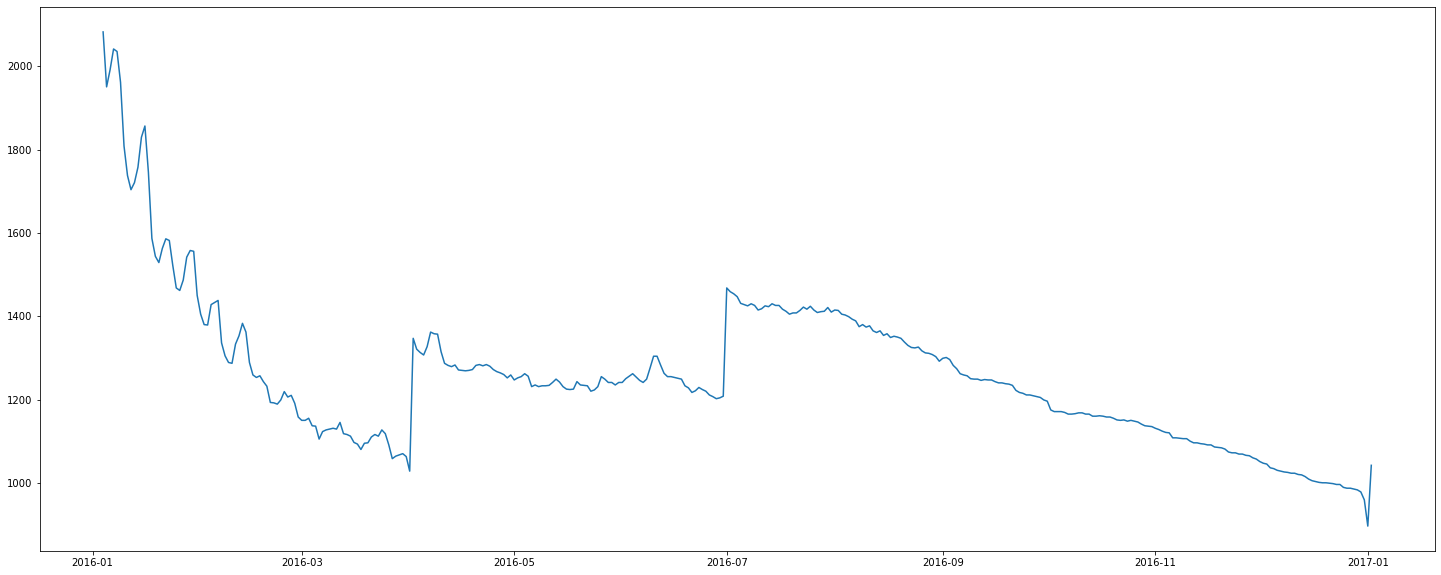

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
plt.plot(df_calendar_unavailable_group_1)

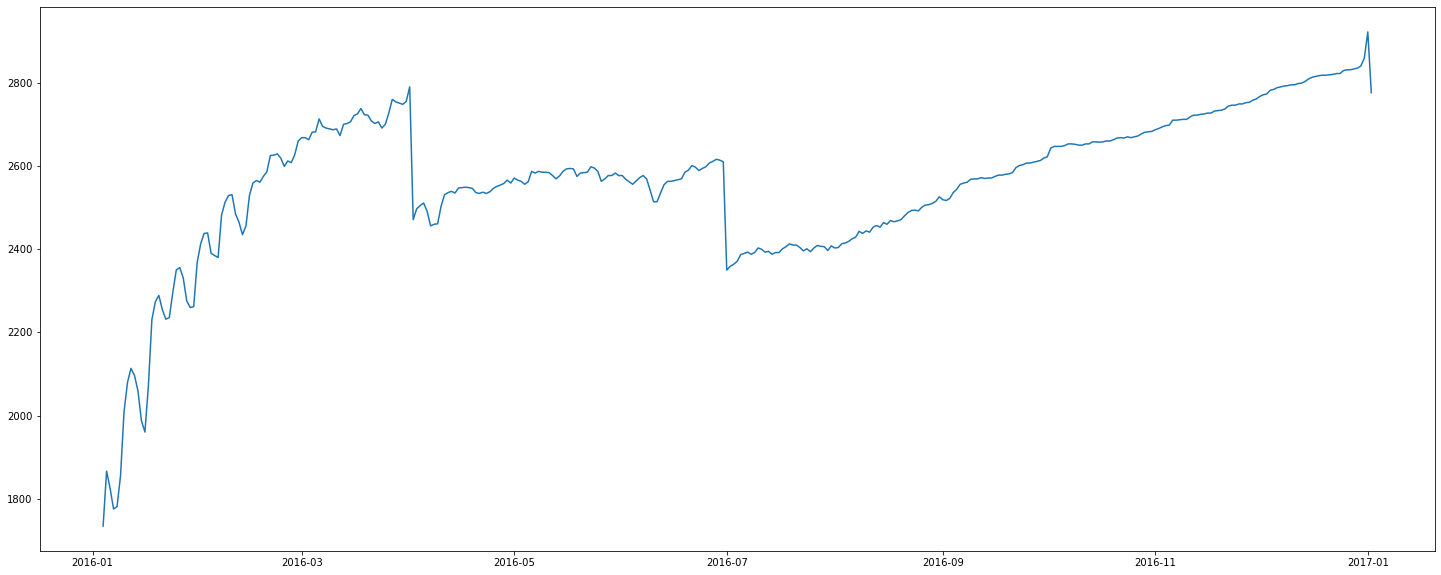

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
plt.plot(df_calendar_available_group_1)

In [26]:
pd.set_option('display.max_rows', 1000)
df_calendar_unavailable_group

,available,date_1
date,,
2016-01-04,2083,2016-01-04
2016-01-05,1951,2016-01-05
2016-01-06,1992,2016-01-06
2016-01-07,2042,2016-01-07
2016-01-08,2036,2016-01-08
2016-01-09,1962,2016-01-09
2016-01-10,1809,2016-01-10
2016-01-11,1738,2016-01-11
2016-01-12,1704,2016-01-12


In [27]:
# January (in general) is a busy month
# Decreasing trend fro January to April 1
# April 2 there is a peak - keeps until July 1
# July 1 another peak - high until the end of August
# Decreasing trend

In [28]:
# Identify holidays in unavailable series

In [29]:
holydays = {'us_holidays_name': ['Independence Day', 'Memorial Day','Labor Day','Veterans Day','New Years Day','Christmas Day','Thanksgiving','Columbus Day'], 'date': ['2016-07-01', '2016-05-30','2016-09-05','2016-11-11','2017-01-01','2016-12-25','2016-11-24','2016-10-10']}
holydays = pd.DataFrame(data=holydays)
holydays

,us_holidays_name,date
0,Independence Day,2016-07-01
1,Memorial Day,2016-05-30
2,Labor Day,2016-09-05
3,Veterans Day,2016-11-11
4,New Years Day,2017-01-01
5,Christmas Day,2016-12-25
6,Thanksgiving,2016-11-24
7,Columbus Day,2016-10-10


In [30]:
# holydays['date'] =  pd.to_datetime(holydays['date'], format='%Y-%m-%d')

In [31]:
holydays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   us_holidays_name  8 non-null      object
 1   date              8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [32]:
#holydays_array = np.array(holydays['date'])

In [33]:
#holydays_array

In [34]:
df_calendar_available_group.head()

,available,date_1
date,,
2016-01-04,1735,2016-01-04
2016-01-05,1867,2016-01-05
2016-01-06,1826,2016-01-06
2016-01-07,1776,2016-01-07
2016-01-08,1782,2016-01-08


In [35]:
df_calendar_unavailable_group.loc[df_calendar_unavailable_group['date_1'].isin(holydays['date'])]

,available,date_1
date,,
2016-05-30,1235,2016-05-30
2016-07-01,1468,2016-07-01
2016-09-05,1274,2016-09-05
2016-10-10,1168,2016-10-10
2016-11-11,1100,2016-11-11
2016-11-24,1072,2016-11-24
2016-12-25,989,2016-12-25
2017-01-01,896,2017-01-01


In [36]:
holydays_filter = df_calendar_unavailable_group.loc[df_calendar_unavailable_group['date_1'].isin(holydays['date'])]
holydays_filter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2016-05-30 to 2017-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  8 non-null      int64         
 1   date_1     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [37]:
holydays_filter_av = df_calendar_available_group.loc[df_calendar_available_group['date_1'].isin(holydays['date'])]
holydays_filter_av.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2016-05-30 to 2017-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  8 non-null      int64         
 1   date_1     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [38]:
#holydays_filter.drop(['date_1'], axis=1, inplace=True)

In [39]:
holydays_filter

,available,date_1
date,,
2016-05-30,1235,2016-05-30
2016-07-01,1468,2016-07-01
2016-09-05,1274,2016-09-05
2016-10-10,1168,2016-10-10
2016-11-11,1100,2016-11-11
2016-11-24,1072,2016-11-24
2016-12-25,989,2016-12-25
2017-01-01,896,2017-01-01


In [40]:
df_calendar_unavailable_group.head()

,available,date_1
date,,
2016-01-04,2083,2016-01-04
2016-01-05,1951,2016-01-05
2016-01-06,1992,2016-01-06
2016-01-07,2042,2016-01-07
2016-01-08,2036,2016-01-08


In [41]:
X = holydays_filter['date_1']
Y = holydays_filter['available']

In [42]:
X_1 = df_calendar_unavailable_group['date_1']
Y_1 = df_calendar_unavailable_group['available']

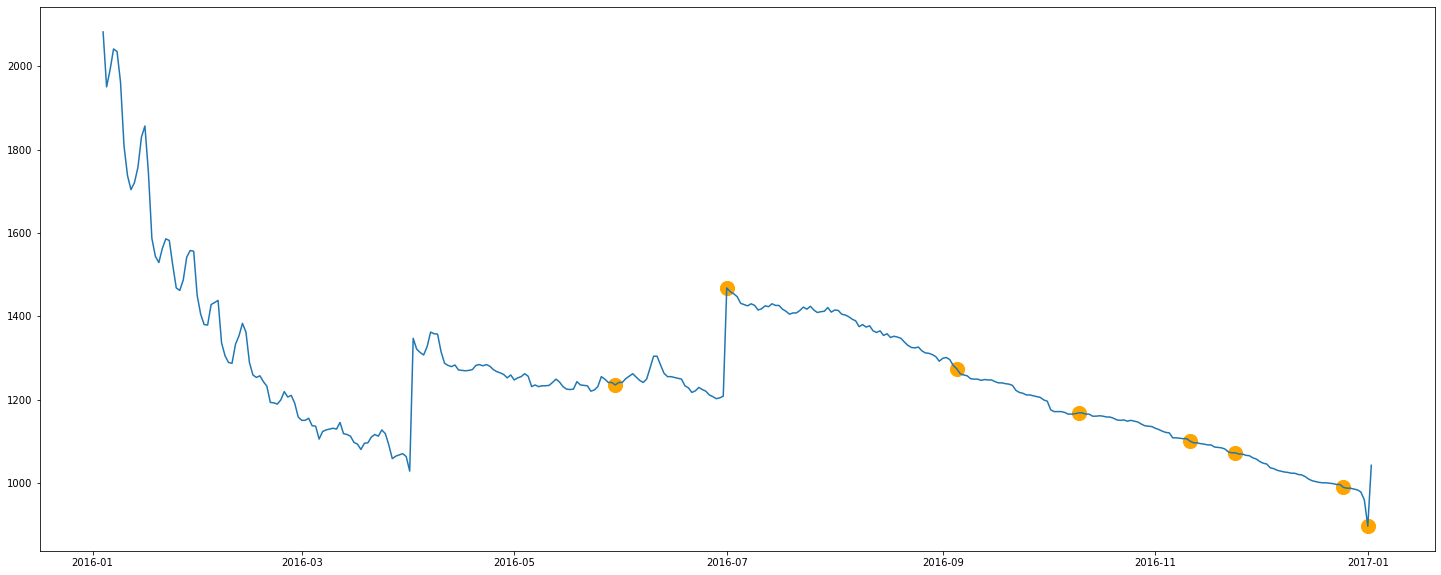

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
plt.plot(df_calendar_unavailable_group_1)
plt.scatter(x=X,y=Y,s=200,color='orange')
plt.show()

In [44]:
X_2 = holydays_filter_av['date_1']
Y_2 = holydays_filter_av['available']

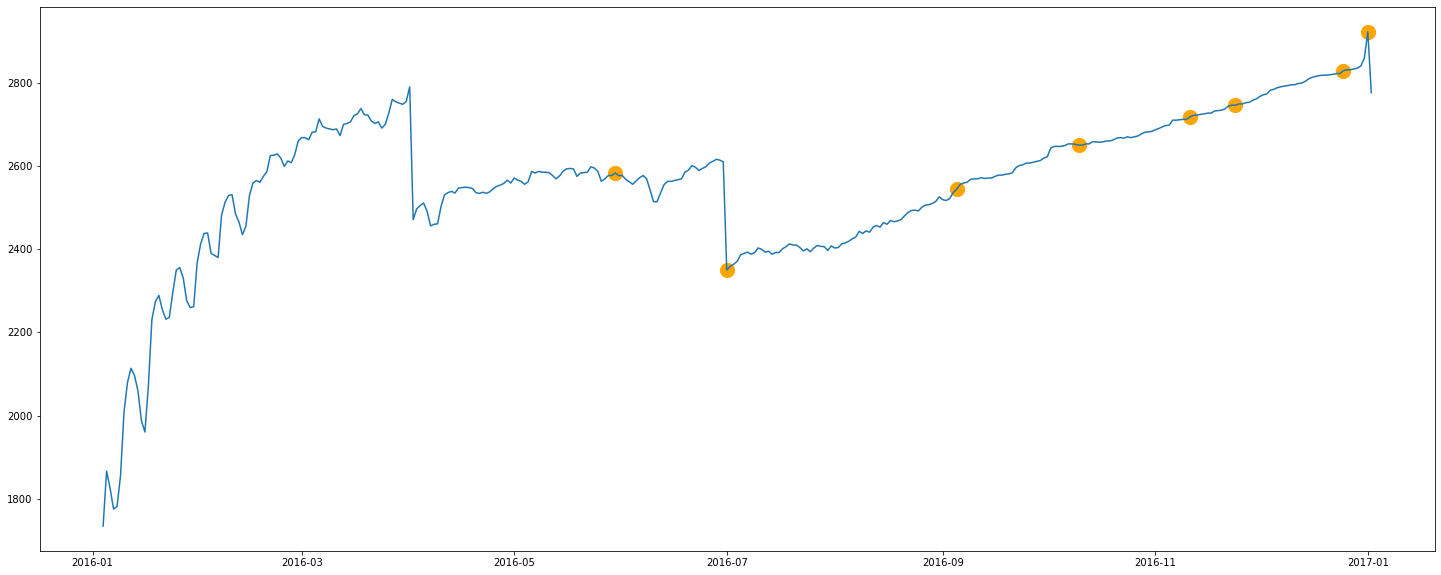

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
plt.plot(df_calendar_available_group_1)
plt.scatter(x=X_2,y=Y_2,s=200,color='orange')
plt.show()

In [46]:
# The only holyday that seems to spike occupancy is Independency Day - July 1

In [47]:
# Next: prices

In [48]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [49]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [50]:
df_calendar[df_calendar['price'].isnull()]

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [51]:
df_calendar_1  = df_calendar.dropna(subset=['price'], axis=0)

In [52]:
df_calendar_1.shape

(934542, 4)

In [53]:
df_calendar_1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [54]:
df_calendar_1.shape

(934542, 4)

In [55]:
df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [56]:
df_calendar_unavailable = df_calendar_1[df_calendar_1['available'] == 'f']

In [57]:
df_calendar_unavailable['price as num'] = df_calendar_unavailable['price'].apply(lambda x: x.split('$')[0])
df_calendar_unavailable['price as num'] = df_calendar_unavailable['price as num'].astype(float)

In [58]:
df_calendar_unavailable = df_calendar[df_calendar['available'] == 'f']

In [59]:
# All unavailavle doesnt have prices

df_calendar_unavailable

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [60]:
# All available listings have prices
df_calendar_available = df_calendar_1[df_calendar_1['available'] == 't']
df_calendar_available.shape

(934542, 4)

In [61]:
df_calendar_available.sample(10)

,listing_id,date,available,price
831493,7363727,2016-01-27,t,$70.00
733963,523883,2016-11-12,t,$68.00
1107067,3441402,2016-01-26,t,$66.00
140557,3773568,2016-02-05,t,$489.00
728193,3282760,2016-01-22,t,$42.00
1204470,6994406,2016-12-04,t,$150.00
199672,4279578,2016-01-21,t,$82.00
135142,8765219,2016-04-05,t,$108.00
715525,1652107,2016-05-08,t,$325.00
1120823,6897639,2016-10-03,t,$400.00


In [62]:
df_calendar_available.loc[0][1]

Timestamp('2016-01-04 00:00:00')

In [63]:
quebra = lambda x: x.split('$')

In [64]:
word = '$75.00'
word.split('$')

['', '75.00']

In [65]:
word = '$75.00'
word.replace('$','')

'75.00'

In [66]:
#df_calendar_available['price as num'] = df_calendar_available['price'].apply(lambda x: x.replace('$','')[0]
#df_calendar_available['price as num'] = df_calendar_available['price as num'].astype(float)

In [67]:
df_calendar_available['price as num'] = df_calendar_available['price'].apply(lambda x: x.replace('$',''))

In [68]:
df_calendar_available.head()

,listing_id,date,available,price,price as num
0,241032,2016-01-04,t,$85.00,85.00
1,241032,2016-01-05,t,$85.00,85.00
9,241032,2016-01-13,t,$85.00,85.00
10,241032,2016-01-14,t,$85.00,85.00
14,241032,2016-01-18,t,$85.00,85.00


In [69]:
df_calendar_available['price as num'] = df_calendar_available['price as num'].astype(float)

ValueError: could not convert string to float: '1,250.00'

In [70]:
word = '1,250.00'
word.replace(',','')

'1250.00'

In [71]:
df_calendar_available[df_calendar_available['price as num'] == '1,250.00']

,listing_id,date,available,price,price as num
959,3308979,2016-08-20,t,"$1,250.00","1,250.00"
960,3308979,2016-08-21,t,"$1,250.00","1,250.00"
961,3308979,2016-08-22,t,"$1,250.00","1,250.00"
962,3308979,2016-08-23,t,"$1,250.00","1,250.00"
963,3308979,2016-08-24,t,"$1,250.00","1,250.00"
964,3308979,2016-08-25,t,"$1,250.00","1,250.00"
965,3308979,2016-08-26,t,"$1,250.00","1,250.00"
966,3308979,2016-08-27,t,"$1,250.00","1,250.00"
967,3308979,2016-08-28,t,"$1,250.00","1,250.00"
968,3308979,2016-08-29,t,"$1,250.00","1,250.00"


In [72]:
df_calendar_available['price as num 2'] = df_calendar_available['price as num'].apply(lambda x: x.replace(',',''))

In [73]:
df_calendar_available[df_calendar_available['price as num 2'] == '1250.00']

,listing_id,date,available,price,price as num,price as num 2
959,3308979,2016-08-20,t,"$1,250.00","1,250.00",1250.00
960,3308979,2016-08-21,t,"$1,250.00","1,250.00",1250.00
961,3308979,2016-08-22,t,"$1,250.00","1,250.00",1250.00
962,3308979,2016-08-23,t,"$1,250.00","1,250.00",1250.00
963,3308979,2016-08-24,t,"$1,250.00","1,250.00",1250.00
964,3308979,2016-08-25,t,"$1,250.00","1,250.00",1250.00
965,3308979,2016-08-26,t,"$1,250.00","1,250.00",1250.00
966,3308979,2016-08-27,t,"$1,250.00","1,250.00",1250.00
967,3308979,2016-08-28,t,"$1,250.00","1,250.00",1250.00
968,3308979,2016-08-29,t,"$1,250.00","1,250.00",1250.00


In [74]:
df_calendar_available['price as num 3'] = df_calendar_available['price as num 2'].astype(float)

In [75]:
df_calendar_available.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      934542 non-null  int64         
 1   date            934542 non-null  datetime64[ns]
 2   available       934542 non-null  object        
 3   price           934542 non-null  object        
 4   price as num    934542 non-null  object        
 5   price as num 2  934542 non-null  object        
 6   price as num 3  934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 97.0+ MB


In [76]:
df_calendar_available.head()

,listing_id,date,available,price,price as num,price as num 2,price as num 3
0,241032,2016-01-04,t,$85.00,85.00,85.00,85.0
1,241032,2016-01-05,t,$85.00,85.00,85.00,85.0
9,241032,2016-01-13,t,$85.00,85.00,85.00,85.0
10,241032,2016-01-14,t,$85.00,85.00,85.00,85.0
14,241032,2016-01-18,t,$85.00,85.00,85.00,85.0


In [77]:
df_calendar_available.drop(['listing_id','available','price','price as num','price as num 2'], axis=1, inplace=True)

In [78]:
df_calendar_available.head()

,date,price as num 3
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0


In [79]:
grupo = df_calendar_available.groupby(['date']).sum()
grupo.head()

,price as num 3
date,
2016-01-04,211819.0
2016-01-05,225312.0
2016-01-06,220815.0
2016-01-07,214823.0
2016-01-08,227456.0


In [80]:
grupo.shape

(365, 1)

In [81]:
df_calendar_available_group_1.shape

(365, 1)

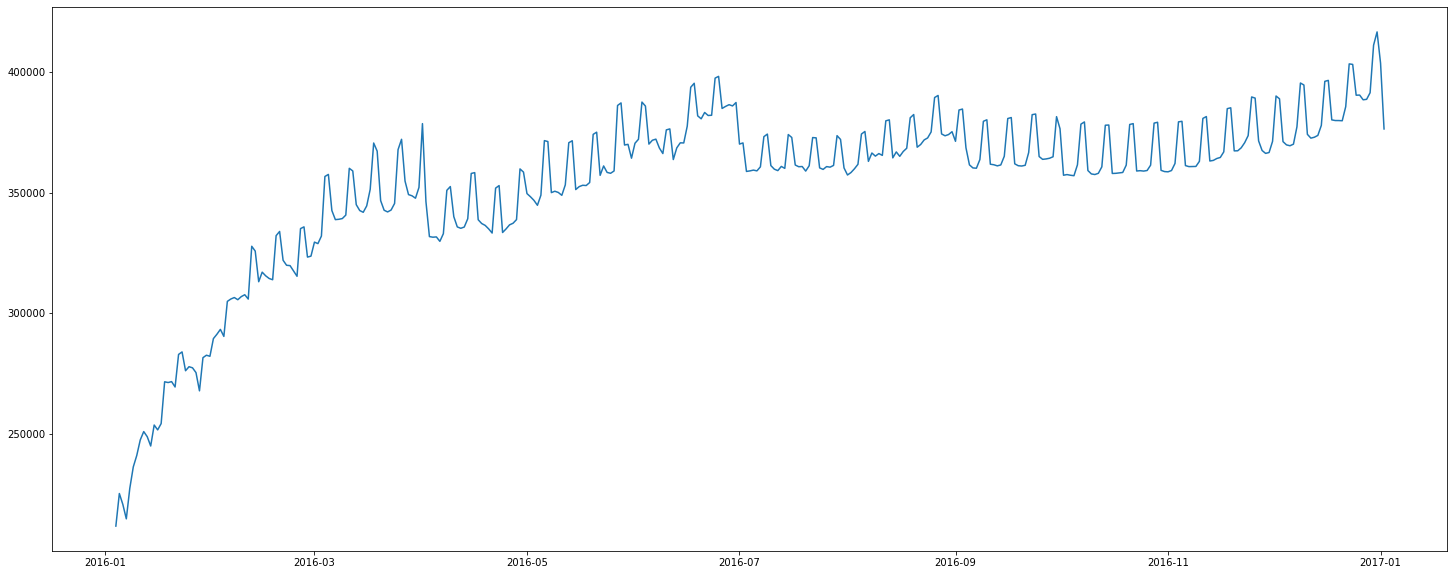

In [82]:
plt.plot(grupo)

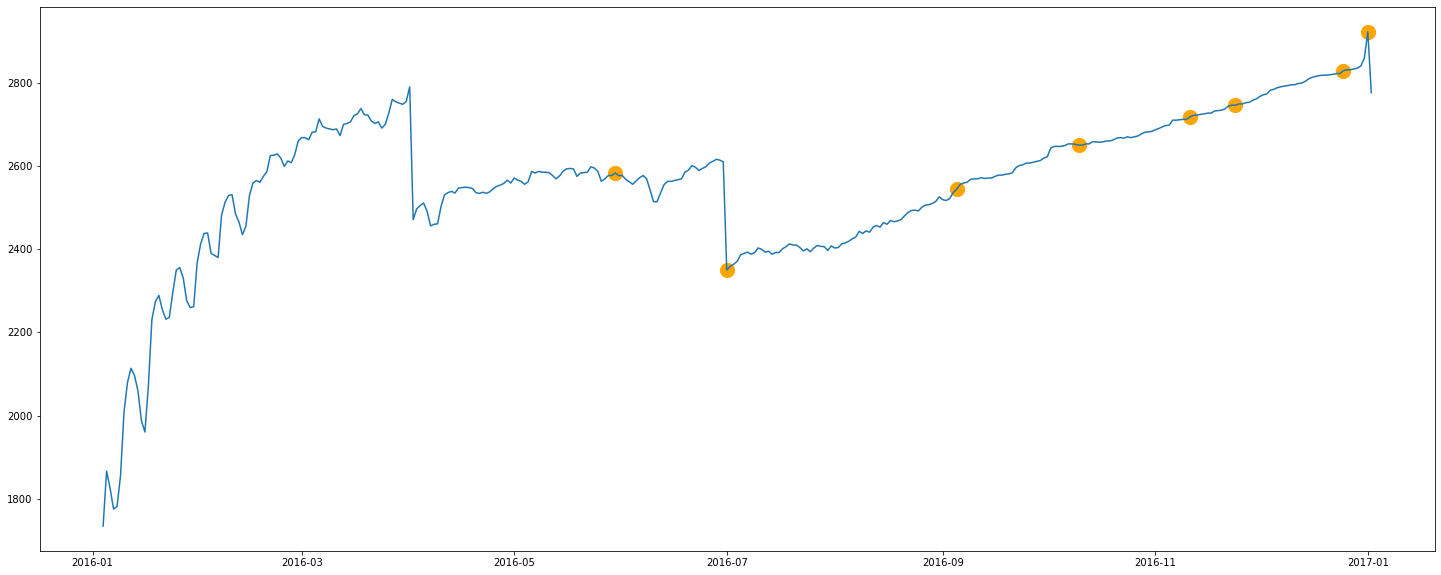

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
plt.plot(df_calendar_available_group_1)
plt.scatter(x=X_2,y=Y_2,s=200,color='orange')
plt.show()

In [143]:
from scipy import stats
stats.spearmanr(grupo, df_calendar_available_group_1)

SpearmanrResult(correlation=0.41377144842905145, pvalue=1.5751652327921563e-16)

In [ ]:
# No clear correlation- it suggests that, as we increase availability the prices tend to increase

In [144]:
# Does the review variables influence price?

In [84]:
df_listings[['number_of_reviews','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]            

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df_reviews = df_listings[['number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','price']]            

<AxesSubplot:>

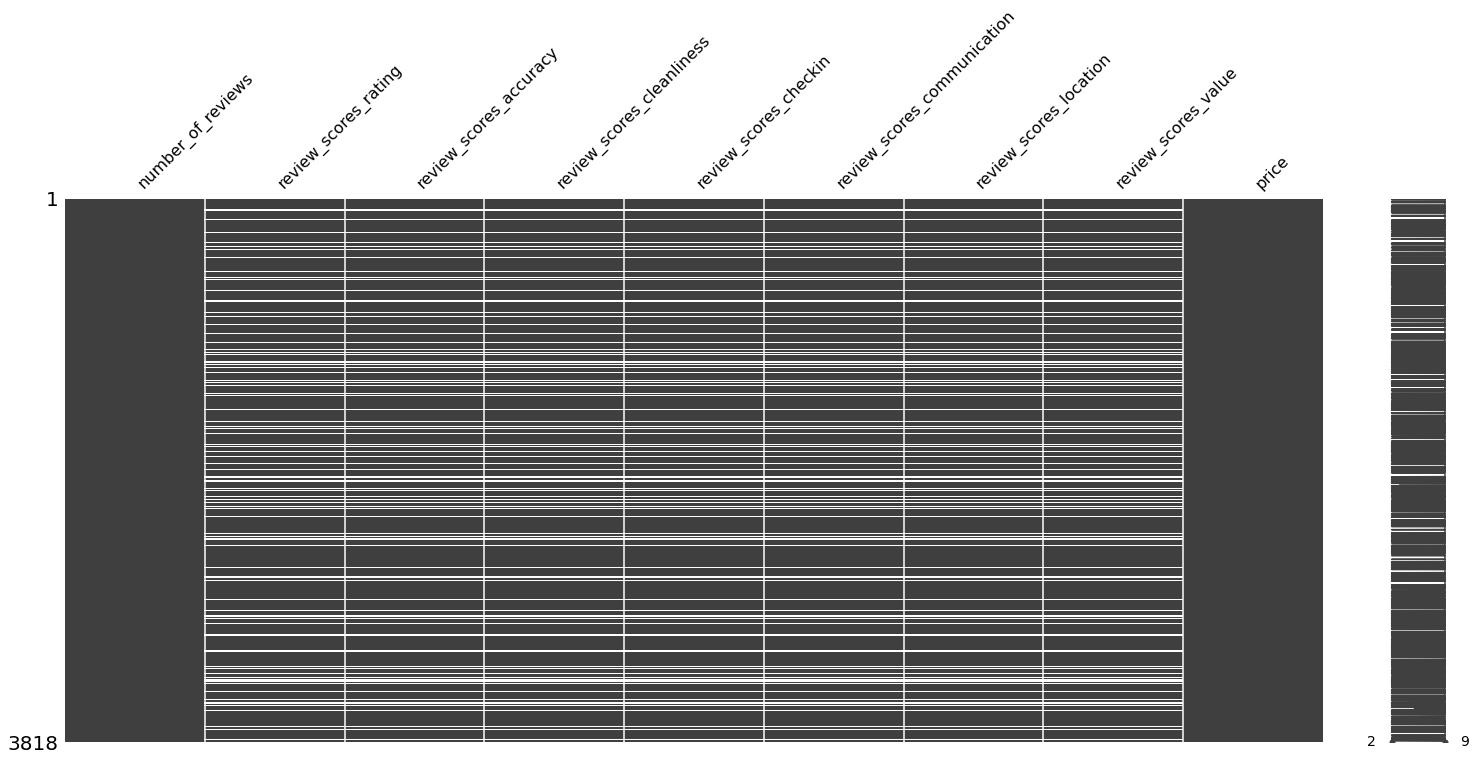

In [90]:
msno.matrix(df_reviews)

In [93]:
df_i = df_reviews
for c in df_i.columns:
    df_i.dropna(subset=[c], axis=0,inplace=True) 

<ipython-input-93-859e063d6869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-93-859e063d6869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-93-859e063d6869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-93-859e063d6869>:3: SettingWithCopyWarning: 
A

In [94]:
df_i

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,$120.00
...,...,...,...,...,...,...,...,...,...
3810,5,92.0,9.0,8.0,10.0,10.0,10.0,8.0,$154.00
3811,2,100.0,9.0,8.0,10.0,10.0,10.0,10.0,$65.00
3812,73,96.0,10.0,10.0,10.0,10.0,9.0,10.0,$95.00
3813,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,$359.00


<AxesSubplot:>

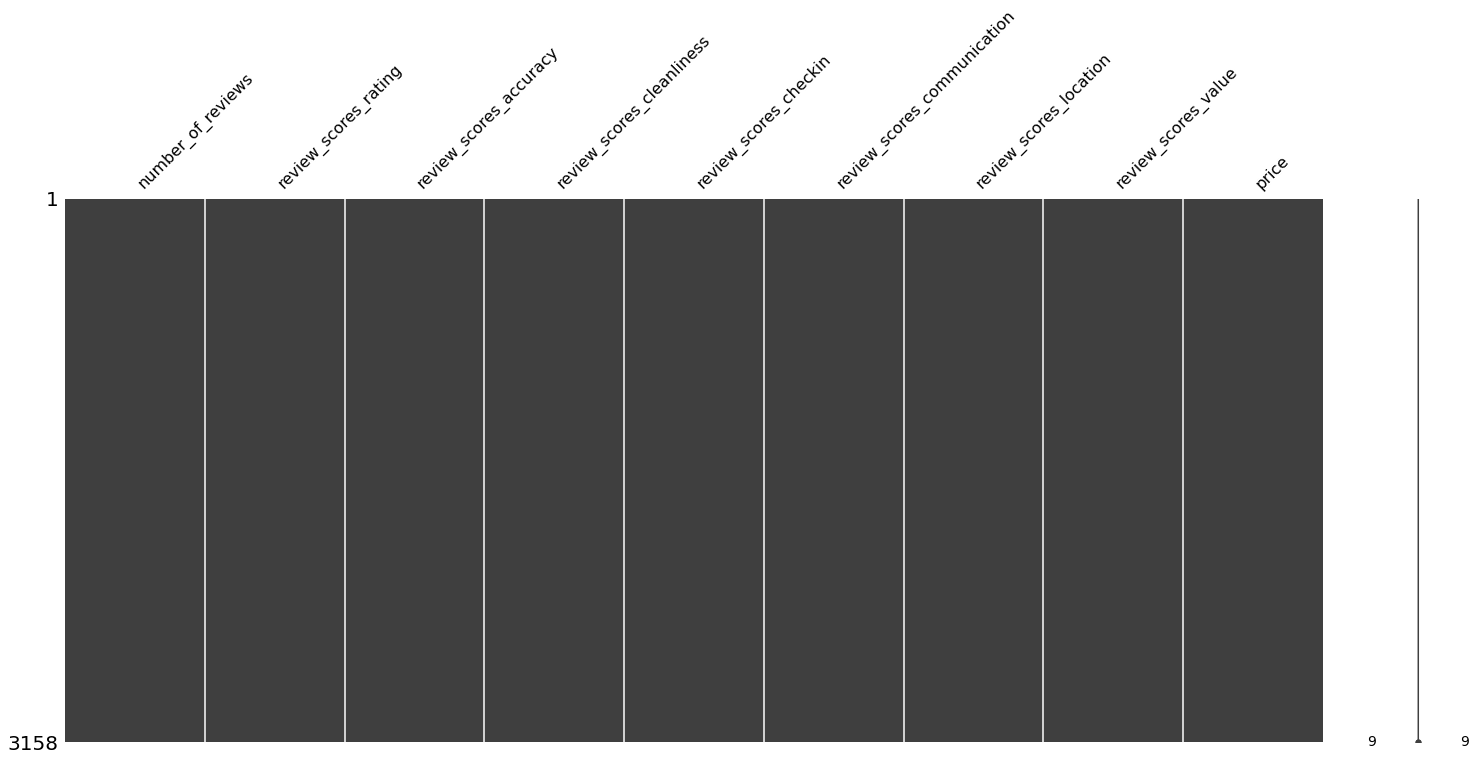

In [95]:
msno.matrix(df_i)

In [99]:
df_reviews.shape

(3818, 9)

In [97]:
df_i.shape

(3158, 9)

In [102]:
df_i.columns

Index(['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price'],
      dtype='object')

In [103]:
df_i['price_2'] = df_i['price'].apply(lambda x: x.replace('$',''))

<ipython-input-103-685f7a991372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['price_2'] = df_i['price'].apply(lambda x: x.replace('$',''))


In [105]:
df_i['price_3'] = df_i['price_2'].apply(lambda x: x.replace(',',''))

<ipython-input-105-7eb641ef6ff2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['price_3'] = df_i['price_2'].apply(lambda x: x.replace(',',''))


In [106]:
df_i['price_4'] = df_i['price_3'].astype(float)

<ipython-input-106-27b403425672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['price_4'] = df_i['price_3'].astype(float)


In [107]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3158 non-null   int64  
 1   review_scores_rating         3158 non-null   float64
 2   review_scores_accuracy       3158 non-null   float64
 3   review_scores_cleanliness    3158 non-null   float64
 4   review_scores_checkin        3158 non-null   float64
 5   review_scores_communication  3158 non-null   float64
 6   review_scores_location       3158 non-null   float64
 7   review_scores_value          3158 non-null   float64
 8   price                        3158 non-null   object 
 9   price_2                      3158 non-null   object 
 10  price_3                      3158 non-null   object 
 11  price_4                      3158 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 320.7+ KB


In [108]:
df_i.drop(['price','price_2','price_3'],inplace=True,axis=1)

C:\Users\crdea\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


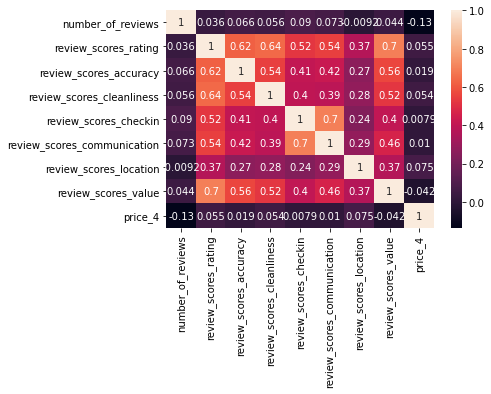

In [109]:
corrMatrix = df_i.corr(method = 'pearson')
sns.heatmap(corrMatrix, annot=True)
plt.show()

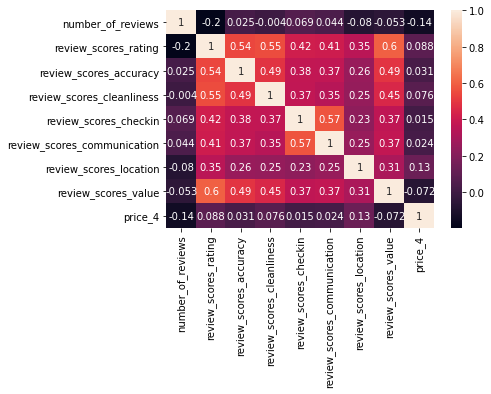

In [110]:
corrMatrix = df_i.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()